In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import pickle
import seaborn as sns
import os

import vdmlab as vdm

from tuning_curves_functions import get_tc, get_odd_firing_idx

import info.R063d2_info as r063d2
import info.R063d3_info as r063d3
import info.R063d4_info as r063d4
import info.R063d5_info as r063d5
import info.R063d6_info as r063d6
import info.R066d1_info as r066d1
import info.R066d2_info as r066d2
import info.R066d4_info as r066d4

In [2]:
pickle_filepath = 'E:\\code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\cache\\pickled\\'
output_filepath = 'E:\\code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\plots\\sequence\\'
# pickle_filepath = 'C:\\Users\\Emily\\Code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\cache\\pickled\\'
# output_filepath = 'C:\\Users\\Emily\\Code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\plots\\sequence\\'

In [3]:
info = r066d4

In [4]:
print(info.session_id)
pos = info.get_pos(info.pxl_to_cm)
csc = info.get_csc()
spikes = info.get_spikes()

tc = get_tc(info, pos, pickle_filepath)

pickled_spike_heatmaps = pickle_filepath + info.session_id + '_spike_heatmaps.pkl'
if os.path.isfile(pickled_spike_heatmaps):
    with open(pickled_spike_heatmaps, 'rb') as fileobj:
        spike_heatmaps = pickle.load(fileobj)
else:
    spikes = info.get_spikes()

    all_neurons = list(range(1, len(spikes['time'])))
    spike_heatmaps = vdm.get_heatmaps(all_neurons, spikes, pos)
    with open(pickled_spike_heatmaps, 'wb') as fileobj:
        pickle.dump(spike_heatmaps, fileobj)

swr_times, swr_idx = vdm.detect_swr_hilbert(csc, fs=info.fs)

sort_idx = vdm.get_sort_idx(tc['u'])

odd_firing_idx = get_odd_firing_idx(tc['u'])


all_u_fields = vdm.find_fields(tc['u'])
all_shortcut_fields = vdm.find_fields(tc['shortcut'])
all_novel_fields = vdm.find_fields(tc['novel'])

u_compare = vdm.find_fields(tc['u'], hz_thres=3)
shortcut_compare = vdm.find_fields(tc['shortcut'], hz_thres=3)
novel_compare = vdm.find_fields(tc['novel'], hz_thres=3)

u_fields_unique = vdm.unique_fields(all_u_fields, shortcut_compare, novel_compare)
shortcut_fields_unique = vdm.unique_fields(all_shortcut_fields, u_compare, novel_compare)
novel_fields_unique = vdm.unique_fields(all_novel_fields, u_compare, shortcut_compare)

u_fields_size = vdm.sized_fields(u_fields_unique)
shortcut_fields_size = vdm.sized_fields(shortcut_fields_unique)
novel_fields_size = vdm.sized_fields(novel_fields_unique)

u_fields = vdm.get_single_field(u_fields_size)
shortcut_fields = vdm.get_single_field(shortcut_fields_size)
novel_fields = vdm.get_single_field(novel_fields_size)


these_fields = []
for key in u_fields:
    these_fields.append(key)

field_spikes = []
field_tc = []
for idx in sort_idx:
    if idx not in odd_firing_idx:
        if idx in these_fields:
            field_spikes.append(spikes['time'][idx])
            field_tc.append(tc['u'][idx])

R066d4
Number of SWR events found:  2458


In [5]:
colours = ['#bd0026', '#fc4e2a', '#ef3b2c', '#ec7014', '#fe9929', 
           '#78c679', '#41ab5d', '#238443', '#66c2a4', '#41b6c4', 
           '#1d91c0', '#8c6bb1', '#225ea8', '#88419d', '#ae017e', 
           '#dd3497', '#f768a1', '#fcbba1', '#fc9272', '#fb6a4a', 
           '#e31a1c', '#fb6a4a', '#993404', '#b30000', '#800026',
           '#bd0026', '#fc4e2a', '#fb6a4a', '#ef3b2c', '#ec7014', 
           '#fe9929', '#78c679', '#41ab5d', '#238443', '#66c2a4', 
           '#41b6c4', '#1d91c0', '#8c6bb1', '#225ea8', '#88419d', 
           '#ae017e', '#dd3497', '#f768a1', '#fcbba1', '#fc9272', 
           '#fb6a4a', '#e31a1c', '#fb6a4a', '#993404', '#b30000', 
           '#800026', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k']

In [6]:
sns.set_style('white')
sns.set_style('ticks')

1991


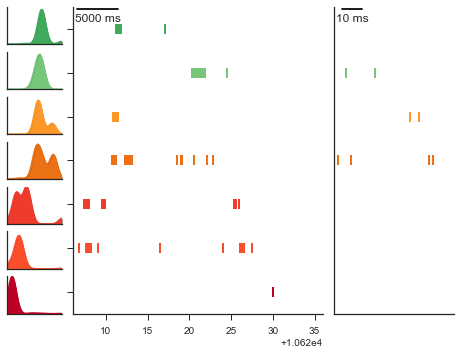

In [23]:
swr = 1991
# for swr in [2090, 2196]:

print(swr)
ms = 10
loc = 2

start_time = info.task_times['phase2'][0]+220
stop_time = info.task_times['phase2'][0]+250

start_time_swr = swr_times['start'][swr]
stop_time_swr = swr_times['stop'][swr]


# for i, (start_time, stop_time, start_time_swr, stop_time_swr) in enumerate(zip(info.sequence['run_start'], 
#                                                                                info.sequence['run_stop'], 
#                                                                                info.sequence['swr_start'], 
#                                                                                info.sequence['swr_stop'])):
spike_loc = 2

rows = len(field_spikes)
cols = 7
fig = plt.figure()
ax1 = plt.subplot2grid((rows, cols), (0, 1), rowspan=rows, colspan=4)
ax2 = plt.subplot2grid((rows, cols), (0, 5), rowspan=rows, colspan=2)

for idx, neuron_spikes in enumerate(field_spikes):
    ax1.plot(neuron_spikes, np.ones(len(neuron_spikes))+(idx*spike_loc+1), '|', 
             color=colours[int(np.floor((idx*spike_loc+1)/spike_loc))], ms=ms, mew=2)
ax1.set_xlim([start_time, stop_time])
ax1.set_ylim([1, len(field_spikes)*spike_loc+1])
vdm.add_scalebar(ax1, matchy=False, loc=loc)
# plt.setp(ax1, xticks=[], xticklabels=[], yticks=[])

for swr_idx, neuron_spikes in enumerate(field_spikes):
    ax2.plot(neuron_spikes, np.ones(len(neuron_spikes))+(swr_idx*spike_loc+1), '|', 
             color=colours[int(np.floor((swr_idx*spike_loc+1)/spike_loc))], ms=ms, mew=2)
ax2.set_xlim([start_time_swr, stop_time_swr])
ax2.set_ylim([1, len(field_spikes)*spike_loc+1])
vdm.add_scalebar(ax2, matchy=False, loc=loc)
plt.setp(ax2, xticks=[], xticklabels=[], yticks=[])

x = list(range(0, len(field_tc[0])))

for ax_loc in range(0, rows):
    ax = plt.subplot2grid((rows, cols), (ax_loc, 0))

    idx = rows - ax_loc - 1
    ax.plot(field_tc[idx], color=colours[idx])
    ax.fill_between(x, 0, field_tc[idx], facecolor=colours[idx])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.setp(ax, xticks=[], xticklabels=[], yticks=[])

sns.despine()
plt.show()
#     filename = info.session_id + '_sequence-swr' + str(i) + '.png'
#     print(filename)
#     savepath = os.path.join(output_filepath, filename)
#     plt.savefig(savepath, dpi=300, bbox_inches='tight')
#     plt.close()

In [ ]:
print(info.sequence['run_start'])

In [24]:
print('run:', start_time, stop_time)
print('swr:', start_time_swr, stop_time_swr)

run: 10626.0 10656.0
swr: 15166.372165 15166.431165
